In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
from sklearn.datasets import load_boston
boston=load_boston()

In [14]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [16]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['Price']= boston.target

In [19]:
# stats of the dataset
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
for feature in dataset.columns:
    print("NA values in ", feature, "is : ", dataset[feature].isnull().sum())

NA values in  CRIM is :  0
NA values in  ZN is :  0
NA values in  INDUS is :  0
NA values in  CHAS is :  0
NA values in  NOX is :  0
NA values in  RM is :  0
NA values in  AGE is :  0
NA values in  DIS is :  0
NA values in  RAD is :  0
NA values in  TAX is :  0
NA values in  PTRATIO is :  0
NA values in  B is :  0
NA values in  LSTAT is :  0
NA values in  Price is :  0


In [21]:
# Correlation among the features and targets 
# very imp step to analyze and get information about the dataset
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
# sns.pairplot(dataset)
# this code will run the pariplot of the above data, which will take more time for excecution

Text(0, 0.5, 'Price')

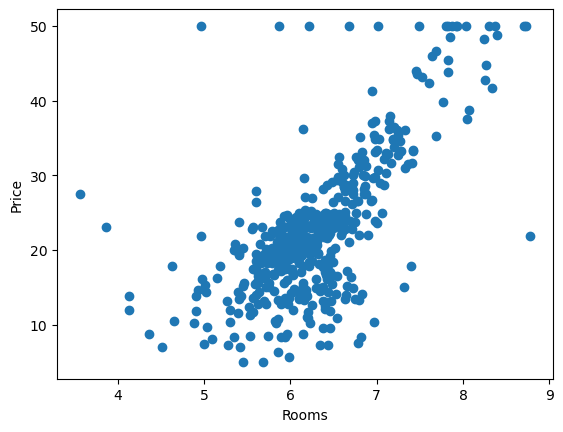

In [25]:
# Analyzing the correlations
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='Price'>

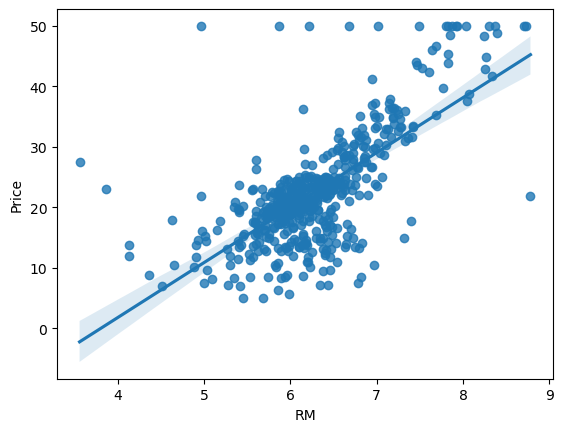

In [26]:
sns.regplot(x="RM", y="Price", data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

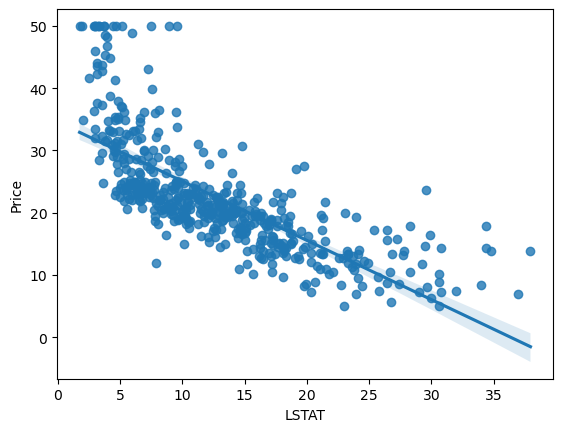

In [27]:
sns.regplot(x="LSTAT", y="Price", data=dataset)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

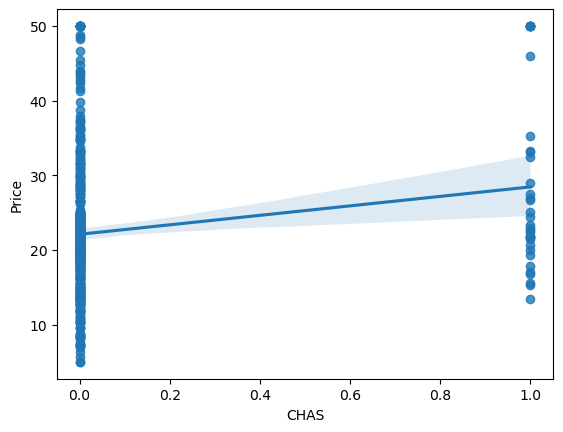

In [29]:
sns.regplot(x="CHAS", y="Price", data=dataset)

In [31]:
# Independednt and dependent features
X = dataset.iloc[:, :-1]
y= dataset.iloc[:, -1]

In [32]:
# train and test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [38]:
# Standardizing the data
# very important step in which the data is not scaled like this data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#Model Training
# going to use the linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [43]:
# printing the coeefiecent and intercept 
# observe the coeffiecents carefully and analyze the data
print(regressor.coef_)
print(regressor.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903956


In [44]:
reg_pred = regressor.predict(X_test)
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

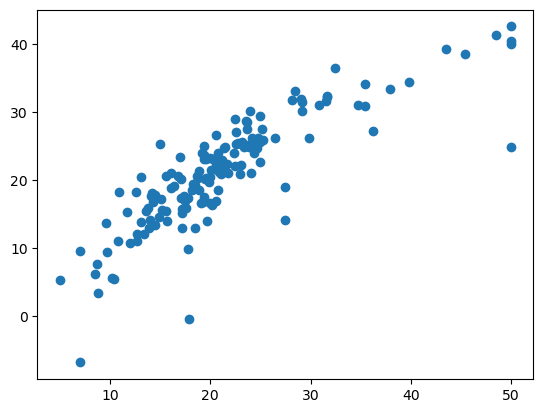

In [45]:
# Assumptions
plt.scatter(y_test, reg_pred)

In [46]:
residual = y_test-reg_pred

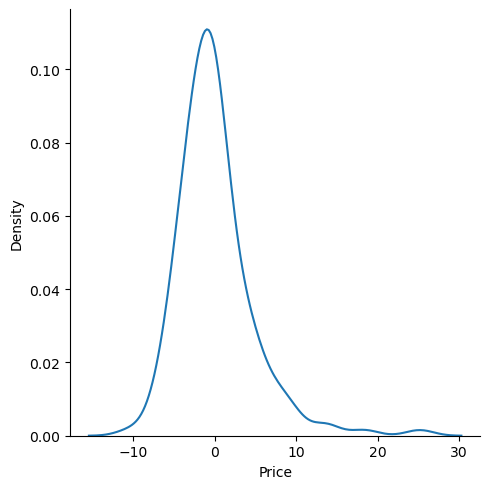

In [48]:
sns.displot(residual, kind='kde')

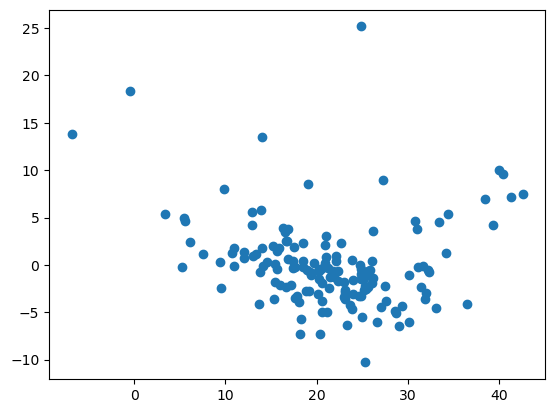

In [50]:
# scatter plot with respect to prediction and residuals
# uniform distribution is observed
# outliers are also observed
plt.scatter(reg_pred, residual)

In [60]:
# Calculating the metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("Mean squared error : ", mean_squared_error(y_test, reg_pred))
print("Mean absolute error : ", mean_absolute_error(y_test, reg_pred))
print("Root mean squared error : ", np.sqrt(mean_squared_error(y_test, reg_pred)))
print("R2 score : ", r2_score(y_test, reg_pred))
# Very good metrics are observed with 71% of r2 score and 4.63 of RMSE

Mean squared error :  21.517444231177205
Mean absolute error :  3.1627098714574053
Root mean squared error :  4.6386899261728205
R2 score :  0.7112260057484933


In [70]:
# New data Prediction
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [71]:
# transforming the new data
scaler.transform(boston.data[0].reshape(1,-1))


C:\Users\Nikhil_2005\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [73]:
regressor.predict(scaler.transform(boston.data[0].reshape(1,-1)))

C:\Users\Nikhil_2005\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

In [75]:
#Pickling the Model file for the deployment
# it is the pricess of converting a python object into a byte stream
# to store it in a file/database,maintian program state across sessions
# or transport data over the network

import pickle
pickle.dump(regressor, open('regmodel.pkl', 'wb'))


In [76]:
pickled_model=pickle.load(open('regmodel.pkl', 'rb'))

In [78]:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

C:\Users\Nikhil_2005\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])